<a href="https://colab.research.google.com/github/Menon-Madhav/Computer_Vision/blob/main/MNIST/digit_recognizer_lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, datasets
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


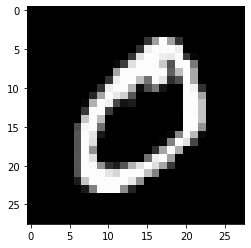

In [ ]:
plt.imshow(x_train[1], cmap='gray')
plt.show()

padding to increase size

In [8]:
x_trains = np.zeros((60000, 32, 32))
for i in range(60000):
  x_trains[i] = np.pad(x_train[i], pad_width = 2, mode='edge')
print(x_trains[0].shape)

(32, 32)


splitting into validation and train data

In [9]:
train_img = x_trains[:49980]
train_label = y_train[:49980]
val_img = x_trains[49980:]
val_label = y_train[49980:]  

In [10]:
train_img = np.reshape(train_img, (49980, 32, 32, 1))
val_img = np.reshape(val_img, (10020, 32, 32, 1))


 Lenet 5 model architecture

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(6, activation = 'relu', input_shape = (32, 32, 1), strides = 1,kernel_size =5 ))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(16, activation = 'relu', strides = 1, kernel_size = 5))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))
          
model.summary()         

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [12]:
model.compile( optimizer = 'adam', 
               loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics = ['accuracy'])
history = model.fit(train_img, train_label, epochs = 20, validation_data = (val_img, val_label))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1562/1562 [==============================] - 35s 22ms/step - loss: 0.2204 - accuracy: 0.9421 - val_loss: 0.0604 - val_accuracy: 0.9817
Epoch 2/20
1562/1562 [==============================] - 32s 21ms/step - loss: 0.0679 - accuracy: 0.9789 - val_loss: 0.0507 - val_accuracy: 0.9856
Epoch 3/20
1562/1562 [==============================] - 32s 21ms/step - loss: 0.0536 - accuracy: 0.9829 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 4/20
1562/1562 [==============================] - 32s 21ms/step - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0494 - val_accuracy: 0.9866
Epoch 5/20
1562/1562 [==============================] - 34s 22ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0504 - val_accuracy: 0.9846
Epoch 6/20
1562/1562 [==============================] - 35s 22ms/step - loss: 0.0323 - accuracy: 0.9899 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 7/20
1562/1562 [==============================] - 35s 23ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0541 - val_accura

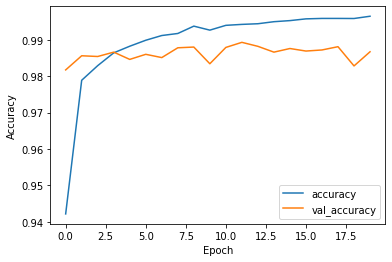

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')



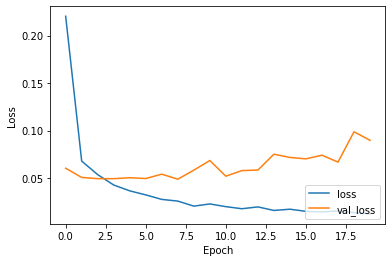

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
                                    
plt.legend(loc='lower right')